In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape


(10000, 28, 28, 1)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=25, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D((2,2)),

                                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),

                                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),


                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 3ms/step - loss: 0.2257 - accuracy: 0.9305
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0163 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [ ]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model/assets


In [ ]:
model = tf.keras.models.load_model('handwritten.model')

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9866


[0.055358655750751495, 0.9865999817848206]

In [ ]:
img = cv2.imread('test3.png')[:, :, 0]

In [ ]:
img = np.invert(np.array([img]))

In [ ]:
img = img.reshape(1, 28 ,28, 1)
img = img/255.0

In [ ]:
prediction = model.predict(img)[0]

In [ ]:
print(np.argmax(prediction))

8


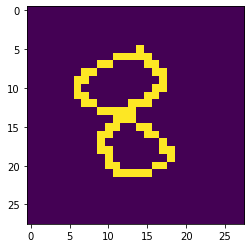

In [ ]:
plt.imshow((tf.squeeze(img[0])))